# Keras - Plot History, Full Report and Grid Search

This notebook provides examples implementing the following

- Plot History : plot loss and accuracy from the history
- Full Report : print a full report and plot a confusion matrix
- Grid Search : uses the GridSearchCV and show how to resolve the issue relative to the multiclass models when using custom scoring

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

seed = 1000

2023-01-11 02:48:43.385834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Functions definition

### Plot Keras History

Plot loss and accuracy for the training and validation set.

In [21]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    print(epochs)
    
    ## Loss
    plt.figure(1, figsize=(15,8))
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b-', lw = 2.5, label='Training loss (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g-', lw = 2.5, label='Validation loss (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    
    plt.title('Loss Graph', fontsize=20)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.savefig('Loss.svg')
    
    ## Accuracy
    plt.figure(2, figsize=(15,8))
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b-', lw=3.0, label='Training accuracy (' + str(format(history.history[l][-1],'.4f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g-', lw=3.0, label='Validation accuracy (' + str(format(history.history[l][-1],'.4f'))+')')

    plt.title('Accuracy Graph', fontsize=20)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.savefig('accuracy.svg')
#     plt.show()

    print(len(loss_list))

## Create a Full Multiclass Report

## Load Data

Text(0, 0.5, 'sepal width (cm)')

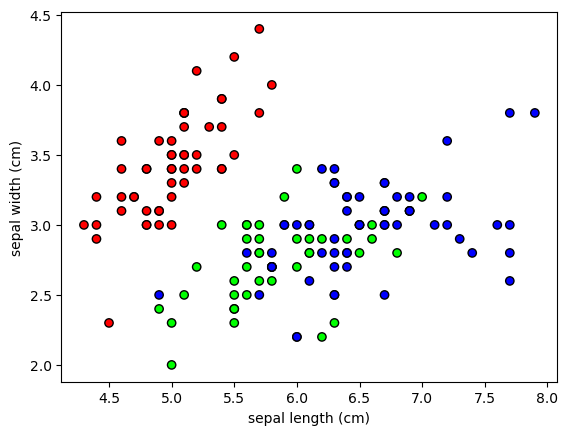

In [3]:
iris = datasets.load_iris()
x = iris.data
y = to_categorical(iris.target)
labels_names = iris.target_names
xid, yid = 0, 1

le = LabelEncoder()
encoded_labels = le.fit_transform(iris.target_names)

plt.scatter(x[:,xid],x[:,yid],c=y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel(iris.feature_names[xid])
plt.ylabel(iris.feature_names[yid])

## Split Train/Val/Test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=seed)

## Basic Keras Model

Create a very basic MLNN with a single Dense layer.

In [5]:
model = Sequential()
model.add(Dense(8,activation='relu',input_shape = (4,)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train,
                    epochs = 200,
                    batch_size = 16,
                    verbose=1,
                    validation_data=(x_val,y_val))

2023-01-11 02:49:18.132727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 02:49:18.134033: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/200
6/6 [==============================] - 1s 87ms/step - loss: 1.3391 - accuracy: 0.3646 - val_loss: 1.5084 - val_accuracy: 0.2500
Epoch 2/200
6/6 [==============================] - 0s 24ms/step - loss: 1.2624 - accuracy: 0.3646 - val_loss: 1.4115 - val_accuracy: 0.2500
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 1.2087 - accuracy: 0.3646 - val_loss: 1.3343 - val_accuracy: 0.2500
Epoch 4/200
6/6 [==============================] - 0s 17ms/step - loss: 1.1672 - accuracy: 0.3646 - val_loss: 1.2702 - val_accuracy: 0.2500
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 1.1398 - accuracy: 0.3646 - val_loss: 1.2293 - val_accuracy: 0.2500
Epoch 6/200
6/6 [==============================] - 0s 16ms/step - loss: 1.1183 - accuracy: 0.3646 - val_loss: 1.1909 - val_accuracy: 0.2500
Epoch 7/200
6/6 [==============================] - 0s 25ms/step - loss: 1.1024 - accuracy: 0.3646 - val_loss: 1.1646 - val_accuracy: 0.2500
Epoch 8/200
6/6 [===

6/6 [==============================] - 0s 25ms/step - loss: 0.7966 - accuracy: 0.7083 - val_loss: 0.8325 - val_accuracy: 0.5833
Epoch 60/200
6/6 [==============================] - 0s 31ms/step - loss: 0.7877 - accuracy: 0.7083 - val_loss: 0.8253 - val_accuracy: 0.5833
Epoch 61/200
6/6 [==============================] - 0s 46ms/step - loss: 0.7869 - accuracy: 0.7083 - val_loss: 0.8211 - val_accuracy: 0.5833
Epoch 62/200
6/6 [==============================] - 0s 30ms/step - loss: 0.7767 - accuracy: 0.7083 - val_loss: 0.8147 - val_accuracy: 0.5833
Epoch 63/200
6/6 [==============================] - 0s 36ms/step - loss: 0.7678 - accuracy: 0.7083 - val_loss: 0.8097 - val_accuracy: 0.5833
Epoch 64/200
6/6 [==============================] - 0s 40ms/step - loss: 0.7619 - accuracy: 0.7083 - val_loss: 0.8002 - val_accuracy: 0.5833
Epoch 65/200
6/6 [==============================] - 0s 23ms/step - loss: 0.7544 - accuracy: 0.7083 - val_loss: 0.7939 - val_accuracy: 0.5833
Epoch 66/200
6/6 [========

6/6 [==============================] - 0s 30ms/step - loss: 0.4917 - accuracy: 0.7083 - val_loss: 0.5308 - val_accuracy: 0.5833
Epoch 118/200
6/6 [==============================] - 0s 36ms/step - loss: 0.4895 - accuracy: 0.7083 - val_loss: 0.5257 - val_accuracy: 0.5833
Epoch 119/200
6/6 [==============================] - 0s 21ms/step - loss: 0.4850 - accuracy: 0.7083 - val_loss: 0.5172 - val_accuracy: 0.6250
Epoch 120/200
6/6 [==============================] - 0s 19ms/step - loss: 0.4817 - accuracy: 0.7083 - val_loss: 0.5152 - val_accuracy: 0.6250
Epoch 121/200
6/6 [==============================] - 0s 28ms/step - loss: 0.4800 - accuracy: 0.7188 - val_loss: 0.5100 - val_accuracy: 0.6250
Epoch 122/200
6/6 [==============================] - 0s 26ms/step - loss: 0.4767 - accuracy: 0.7083 - val_loss: 0.5075 - val_accuracy: 0.6250
Epoch 123/200
6/6 [==============================] - 0s 36ms/step - loss: 0.4737 - accuracy: 0.7188 - val_loss: 0.5036 - val_accuracy: 0.6250
Epoch 124/200
6/6 [=

Epoch 175/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3650 - accuracy: 0.8646 - val_loss: 0.3674 - val_accuracy: 0.9167
Epoch 176/200
6/6 [==============================] - 0s 19ms/step - loss: 0.3648 - accuracy: 0.8646 - val_loss: 0.3669 - val_accuracy: 0.9167
Epoch 177/200
6/6 [==============================] - 0s 29ms/step - loss: 0.3633 - accuracy: 0.8438 - val_loss: 0.3632 - val_accuracy: 0.9167
Epoch 178/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3598 - accuracy: 0.8750 - val_loss: 0.3609 - val_accuracy: 0.9167
Epoch 179/200
6/6 [==============================] - 0s 29ms/step - loss: 0.3585 - accuracy: 0.9167 - val_loss: 0.3602 - val_accuracy: 0.9167
Epoch 180/200
6/6 [==============================] - 0s 30ms/step - loss: 0.3587 - accuracy: 0.8646 - val_loss: 0.3583 - val_accuracy: 0.9167
Epoch 181/200
6/6 [==============================] - 0s 23ms/step - loss: 0.3541 - accuracy: 0.8958 - val_loss: 0.3547 - val_accuracy: 0.9167
Epoch 

range(1, 201)
1


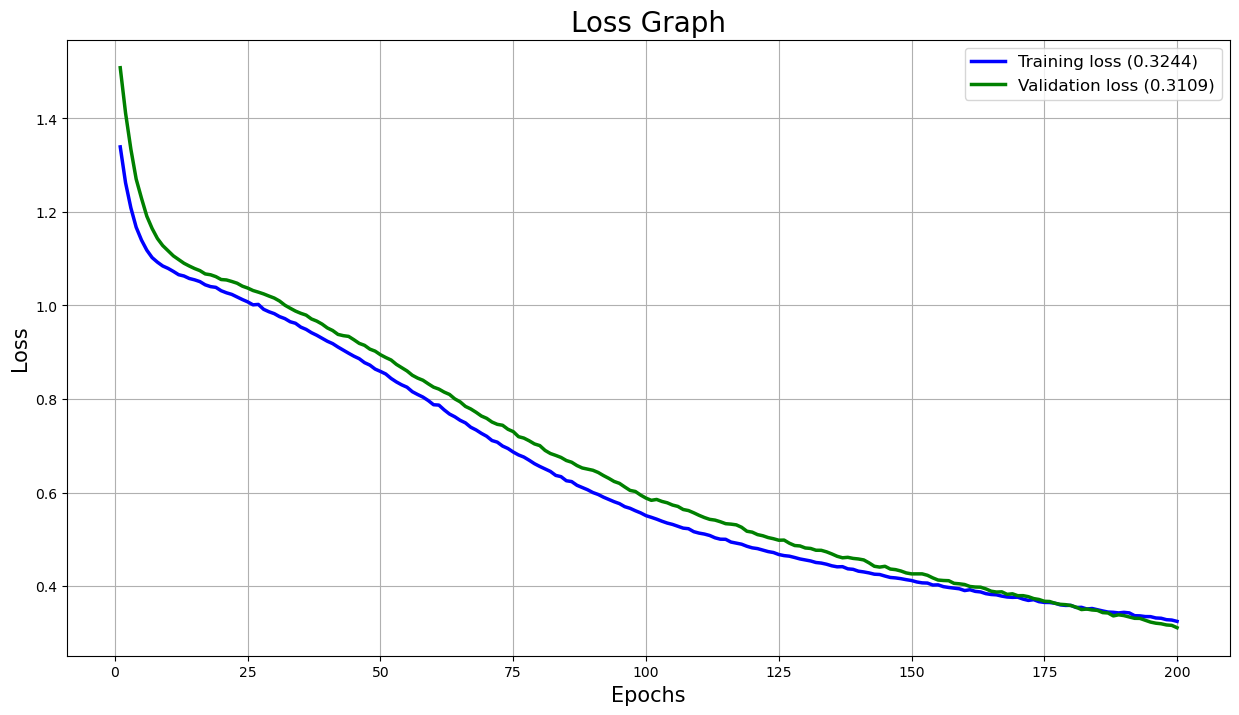

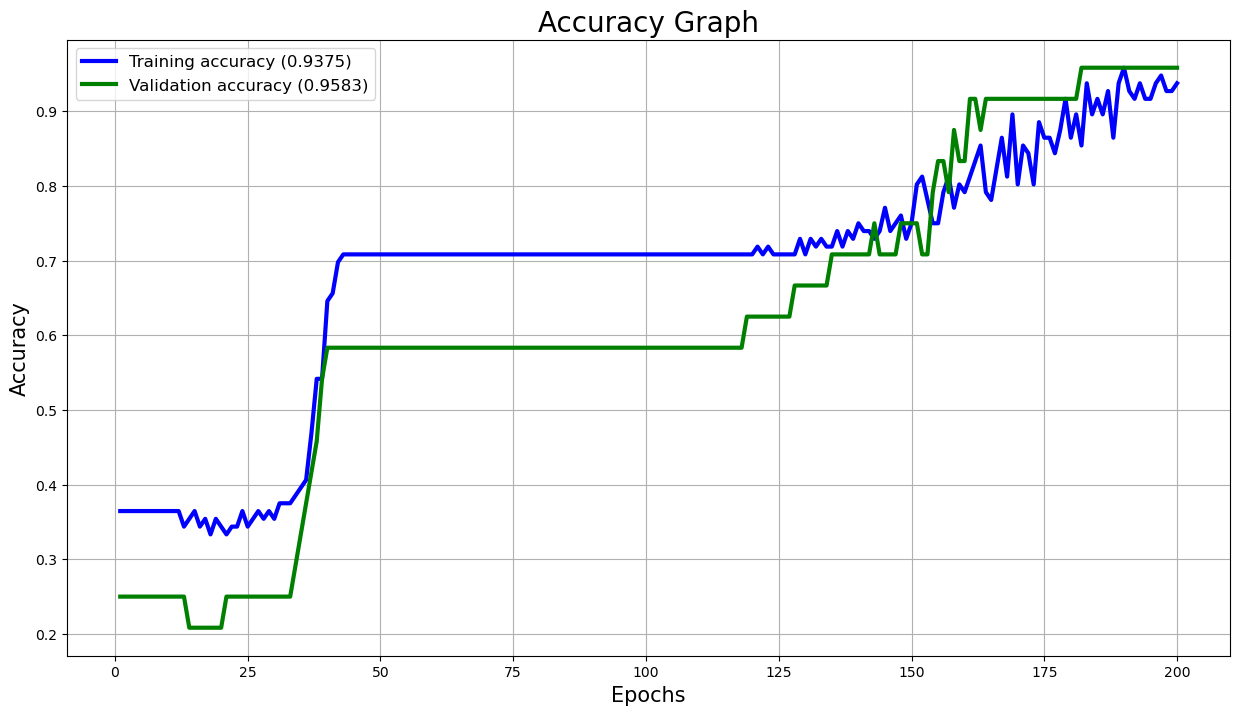

In [22]:
plot_history(history)

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
history.history

{'loss': [1.3390990495681763,
  1.2623826265335083,
  1.2086726427078247,
  1.1672247648239136,
  1.139811635017395,
  1.1182619333267212,
  1.102366328239441,
  1.0925672054290771,
  1.084408164024353,
  1.0793079137802124,
  1.072811484336853,
  1.0657334327697754,
  1.0629819631576538,
  1.0576961040496826,
  1.0547934770584106,
  1.0509880781173706,
  1.0441182851791382,
  1.0403023958206177,
  1.038694977760315,
  1.0315181016921997,
  1.0270791053771973,
  1.023667812347412,
  1.0181884765625,
  1.0126174688339233,
  1.0076603889465332,
  1.001322627067566,
  1.0022109746932983,
  0.9917449355125427,
  0.9865469932556152,
  0.9824922680854797,
  0.9760997891426086,
  0.9718630909919739,
  0.9651613831520081,
  0.9618716835975647,
  0.9536382555961609,
  0.9488242268562317,
  0.9418019652366638,
  0.9362807869911194,
  0.9298359751701355,
  0.9234445691108704,
  0.9183809161186218,
  0.9110845923423767,
  0.9044241309165955,
  0.8978579044342041,
  0.8915281891822815,
  0.88614463

In [31]:
history.history[1][-1]

KeyError: 1

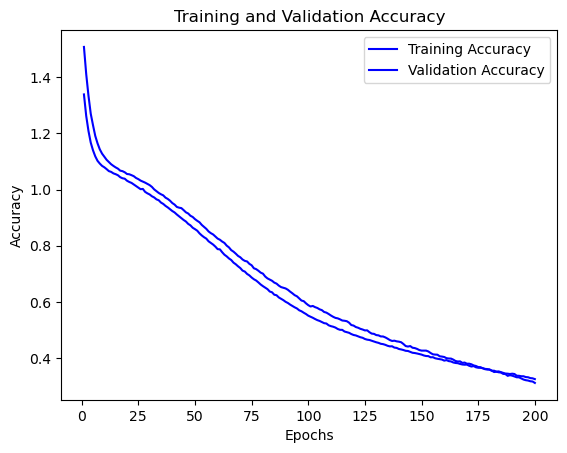

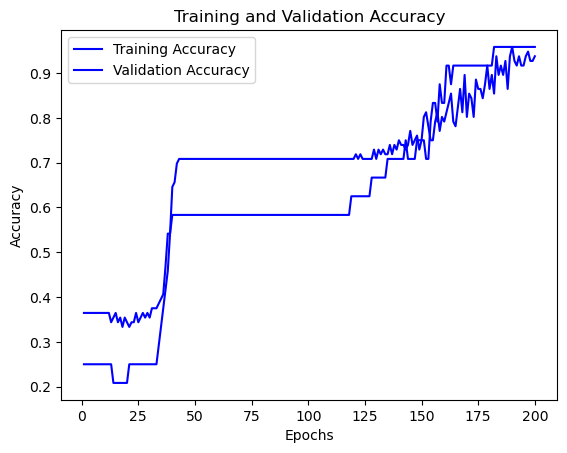

In [38]:
history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, train_loss,'b',label='Training Accuracy')
plt.plot(epochs, val_loss,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, train_acc,'b',label='Training Accuracy')
plt.plot(epochs, val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
print(len(train_acc))

200
